In [8]:
import elm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression

## test if the ELM is correct

In [9]:
stdsc = StandardScaler()
# load dataset
iris = load_iris()
irx, iry = stdsc.fit_transform(iris.data), iris.target
x_train, x_test, y_train, y_test = train_test_split(irx, iry, test_size=0.2)
# built model and train
model = elm.elm(hidden_units=35, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
# print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
# print('classifier running time:', running_time)

# test
# prediction = model.predict(x_test)
# print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(x_test, y_test))

classifier train accuracy: 0.9583333333333334
classifier test accuracy: 1.0


# test the graph data
---

## the functions about ploting

In [118]:
def acc_curve(n,X_train,X_test,y_train,y_test,C=0.1):
    model=elm.elm(
        hidden_units=n, 
        activation_function='sigmoid', 
        random_type='normal', 
        x=X_train, y=y_train, 
        C=C, elm_type='clf'
    )
    _, train_accuracy, _ = model.fit('solution2')
    test_accuracy=model.score(X_test,y_test)
    return (train_accuracy,test_accuracy)

def plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.01,title='with all features'):
    train_accuracy_list=[]
    test_accuracy_list=[]
    x_plot=[*range(5,300,5)]
    for i in range(5,300,5):
        acc_train,acc_test=acc_curve(i,X_train,X_test,y_train,y_test,C)
        train_accuracy_list.append(acc_train)
        test_accuracy_list.append(acc_test)
    plt.figure(figsize=(15,5))
    plt.plot(x_plot,train_accuracy_list,color='r',label='train_accuracy')
    plt.plot(x_plot,test_accuracy_list,color='b',label='test_accuracy')
    plt.legend()
    plt.xticks([*range(5,300,15)])
    plt.grid()
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('nums of hidden layer')
    plt.show()

## data

In [124]:
def sift_features(df,dislike_fea=[]):
    '''
    function to sift the features,in order to figure out that what feature have great influence to the prediction
    dislike_fea: (list),the elements of the list is str
    '''
    X=df[df.columns.difference(['class']+dislike_fea)]
    y=df.iloc[:,-1].values
    ss=StandardScaler()
    X_norm=ss.fit_transform(X)
    return X_norm,y

In [125]:
list(df_graph.columns)

['common_neighbors',
 'neighbor_a',
 'neighbor_b',
 'totoal_degree_neighbors_a',
 'totoal_degree_neighbors_b',
 'node_path',
 'total_degree_common_neighbor',
 'class']

In [197]:
df_graph=pd.read_csv('graph_karate_df',index_col=0)

----

In [166]:
# def test_function(df=df_graph,feature=[],C=0.01):
#     '''
#     just wirte a simple function to help me plot curve
#     feature is a list: contain the features that we want to detach
#     '''
#     titles='with all features'
#     if len(feature)!=0:
#         titles=feature[0]
#     X_norm,y=sift_features(df,feature)
#     # split the graph into training set and test set
#     X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
#     plot_train_test_curve(X_train,X_test,y_train,y_test, C=0.01,title=titles)

## with all features

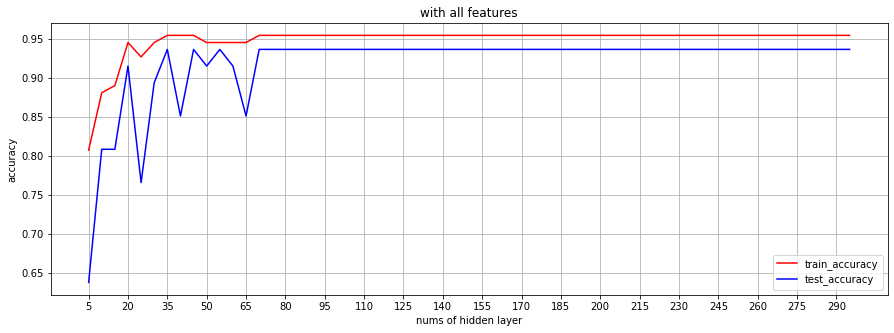

In [215]:
X_norm,y=sift_features(df_graph)
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.08)

## without node_path

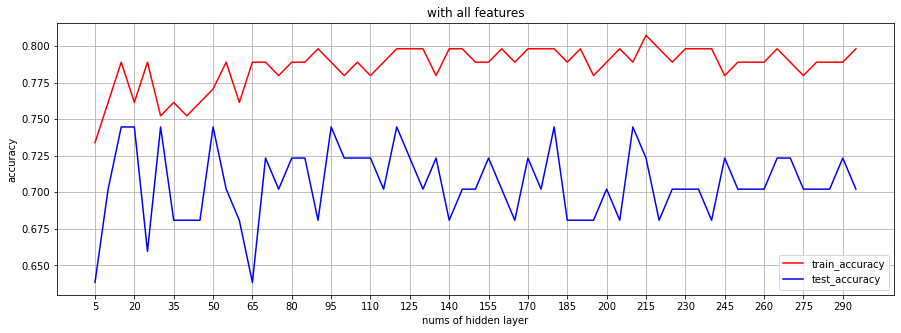

In [218]:
X_norm,y=sift_features(df_graph,dislike_fea=['node_path'])
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.08)

# without total_degree_common_neighbor

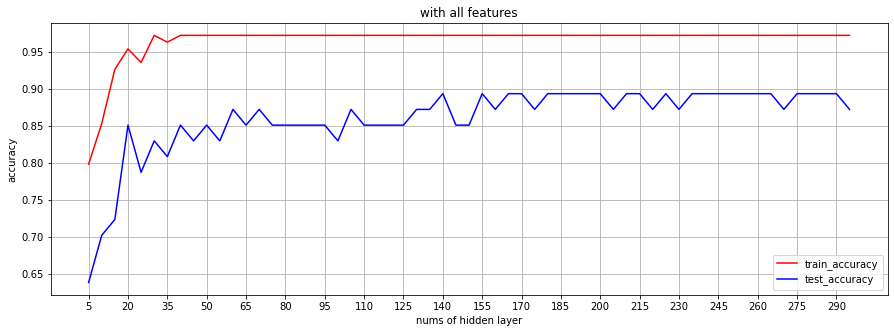

In [223]:
X_norm,y=sift_features(df_graph,dislike_fea=['total_degree_common_neighbor'])
X_train,X_test,y_train,y_test=train_test_split(X_norm, y, test_size=0.3)
plot_train_test_curve(X_train,X_test,y_train,y_test,C=0.08)

In [56]:
# # so we choose the nums of hidden_units=60
# model=elm.elm(hidden_units=35, activation_function='sigmoid', random_type='normal', x=X_train, y=y_train, C=0.1, elm_type='clf')
# beta, train_accuracy, running_time = model.fit('solution2')
# print("classifier train accuracy:", train_accuracy)
# prediction = model.predict(X_test)
# # print("classifier test prediction:", prediction)
# print('classifier test accuracy:', model.score(X_test, y_test))

classifier train accuracy: 0.9541284403669725
classifier test accuracy: 0.9361702127659575
